In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from plot import save_plots
from metrics import dice_coef
from r2udensenet_1d import r2udensenet
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from data2D_ucsf_1d import load_test_data

2023-12-02 00:20:42.590293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 00:20:43.270712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erdiaz/miniconda3/envs/tf/lib/:/home/erdiaz/miniconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib:/usr/lib/cuda/lib64:
2023-12-02 00:20:43.270780: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_P

====== Loading of ALL UCSF Test Data with Tumors =======


2023-12-02 00:20:47.209384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-12-02 00:20:47.793433: W tensorflow/core/kernels/gpu_utils.cc:70] Failed to check cudnn convolutions for out-of-bounds reads and writes with an error message: 'Failed to load in-memory CUBIN: CUDA_ERROR_INVALID_IMAGE: device kernel image is invalid'; skipping this check. This only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


6/6 [==============================] - 5s 333ms/step


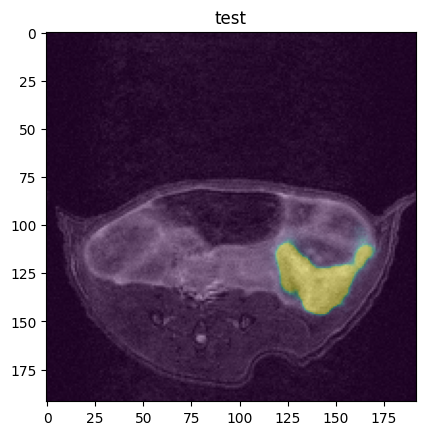

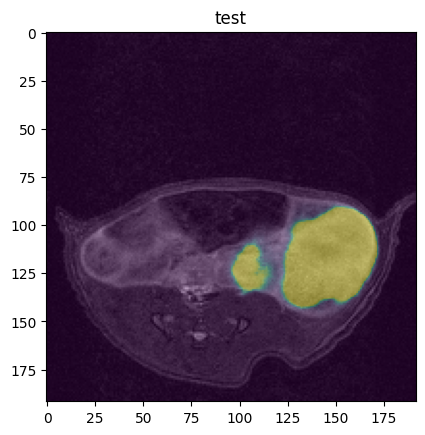

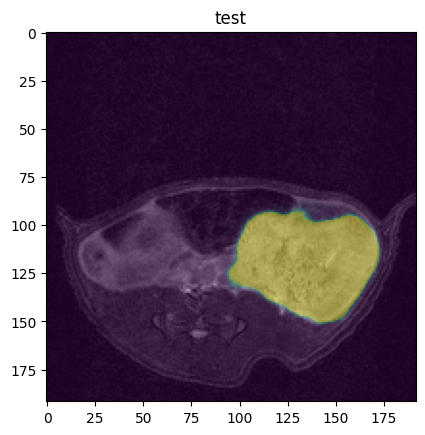

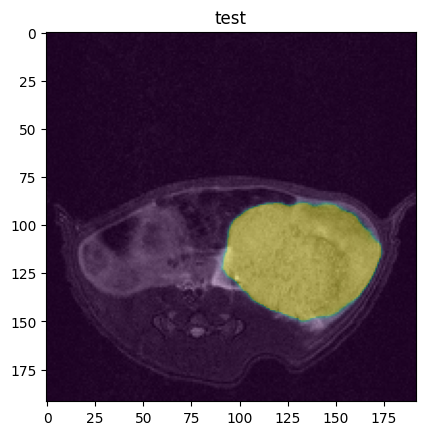

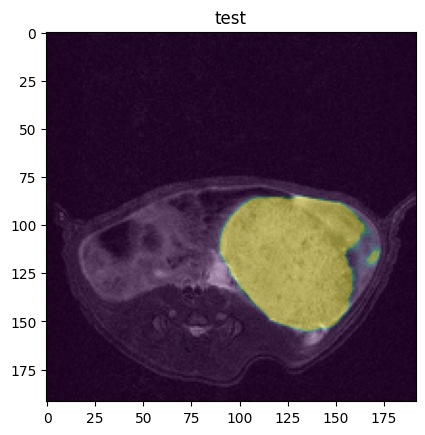

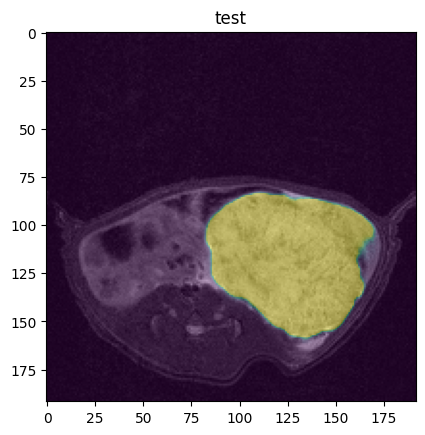

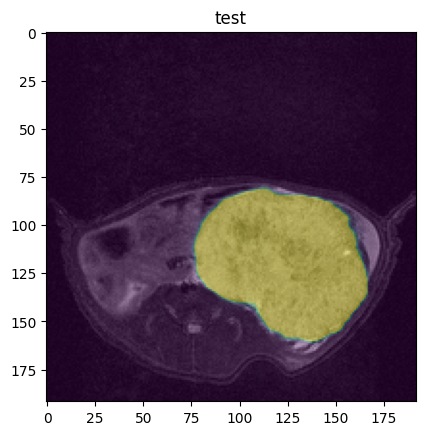

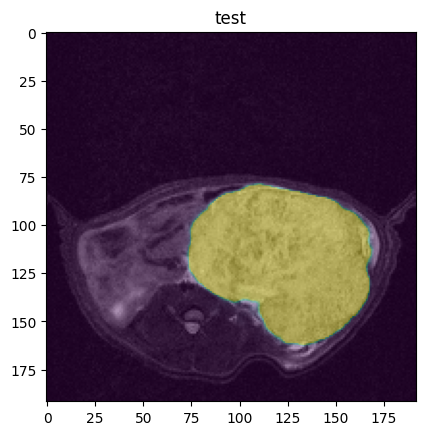

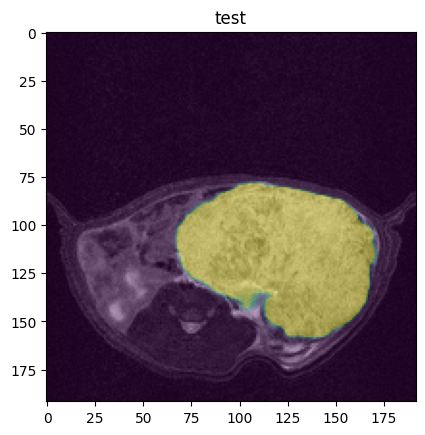

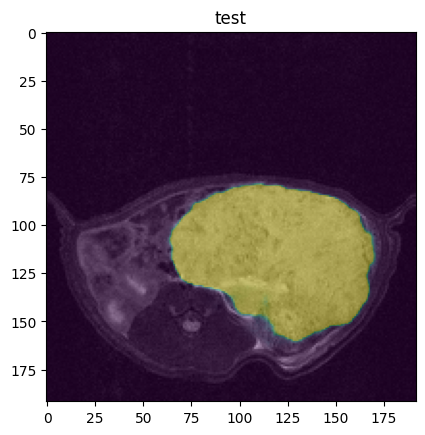

In [2]:


# mask_train = mask_train.astype('float64')

model = r2udensenet()



# mask_train /= 255.
model.load_weights("/data/ernesto/UCSF-Prostate-Segmentation/logs/Training_10_11_2023/plots1/weights/saved-model-186-0.39.hdf5")

images_test = load_test_data()
images_test = images_test.astype('float64')
images_test_mean = np.mean(images_test)
images_test_std = np.std(images_test)
images_test = (images_test - images_test_mean)/images_test_std
images_test = images_test.reshape(images_test.shape[0],192,192,1)



predict = model.predict(images_test)

#add dice coeff and iou 
#add ground truth

# predict_images = predict.shape[0]
# images_train = images_train

for i in range(len(images_test[:10])):
    orginal_image = images_test[i].reshape(192,192)
    predict_image = predict[i].reshape(192,192)


    plt.figure()
    plt.imshow(orginal_image,cmap = 'gray')
    plt.imshow(predict_image,cmap = 'viridis',alpha=0.4)
    plt.title('test')
    plt.show()
    # trainMask = mask_train[image]